# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

val_set = val_datagen.flow_from_directory('dataset/val',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
model1 = tf.keras.models.Sequential()

### Step 1 - Convolution

In [5]:
model1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [6]:
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [7]:
model1.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [8]:
model1.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [9]:
model1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [10]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3936384   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


### Training the CNN on the Training set and evaluating it on the Test set

In [12]:
history = model1.fit(x = training_set, validation_data = val_set, epochs = 25)

Epoch 1/25
163/163 [==============================] - 92s 563ms/step - loss: 0.6719 - accuracy: 0.7359 - val_loss: 0.4025 - val_accuracy: 0.8125
Epoch 2/25
163/163 [==============================] - 90s 551ms/step - loss: 0.2408 - accuracy: 0.8948 - val_loss: 0.8003 - val_accuracy: 0.6875
Epoch 3/25
163/163 [==============================] - 90s 550ms/step - loss: 0.1858 - accuracy: 0.9273 - val_loss: 0.4323 - val_accuracy: 0.8125
Epoch 4/25
163/163 [==============================] - 90s 551ms/step - loss: 0.1874 - accuracy: 0.9312 - val_loss: 1.3244 - val_accuracy: 0.6250
Epoch 5/25
163/163 [==============================] - 90s 551ms/step - loss: 0.1744 - accuracy: 0.9319 - val_loss: 0.8586 - val_accuracy: 0.6875
Epoch 6/25
163/163 [==============================] - 90s 549ms/step - loss: 0.1729 - accuracy: 0.9317 - val_loss: 1.0677 - val_accuracy: 0.6875
Epoch 7/25
163/163 [==============================] - 90s 554ms/step - loss: 0.1608 - accuracy: 0.9333 - val_loss: 0.4543 - val_ac

## Accuracy

In [13]:
train_loss, train_acc  = model1.evaluate(training_set)
test_loss, test_acc = model1.evaluate(test_set)
train_acc = train_acc*100
test_acc = test_acc*100
print('train: %.2f, test: %.2f' % (train_acc, test_acc))

20/20 [==============================] - 9s 434ms/step - loss: 0.4507 - accuracy: 0.8894
train: 96.49, test: 88.94


## Model Accuracy Graph

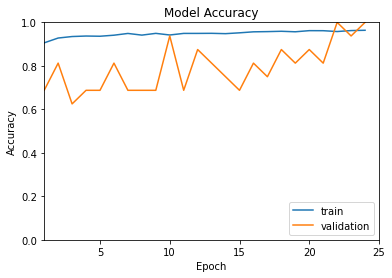

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([1,25])
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.savefig('model1_AccuracyVsValidationAccuracyGraph.jpg')

## Model Loss Graph

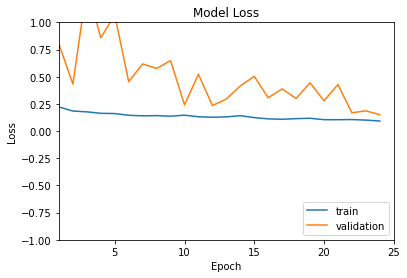

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([-1, 1])
plt.xlim([1,25])
plt.title('Model Loss')
plt.legend(loc='lower right')
plt.savefig('model1_LossVsLossValidation.jpg')

In [46]:
model1.save('cnnModel1.h5')